In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
original = cv.imread("data/C0383713713R_full.jpg")
image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
image = cv.resize(image, (500, 500))
def plotBoth(image, title='Processed Image', original=original, original_title='Original Image'):
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(121)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(original_title)

    # Plot resized image
    plt.subplot(122)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    # Set the background of the plot to be transparent
    plt.gcf().patch.set_alpha(0)
    plt.show()

## Downscaling

<Figure size 1000x500 with 0 Axes>

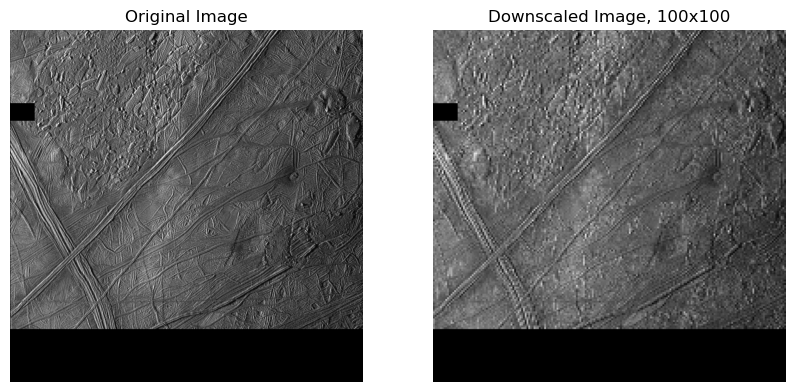

In [3]:
# Resize the image
resized_image = cv.resize(image, (200, 200))

plotBoth(resized_image, 'Downscaled Image, 100x100')

## Gaussian Blur

<Figure size 1000x500 with 0 Axes>

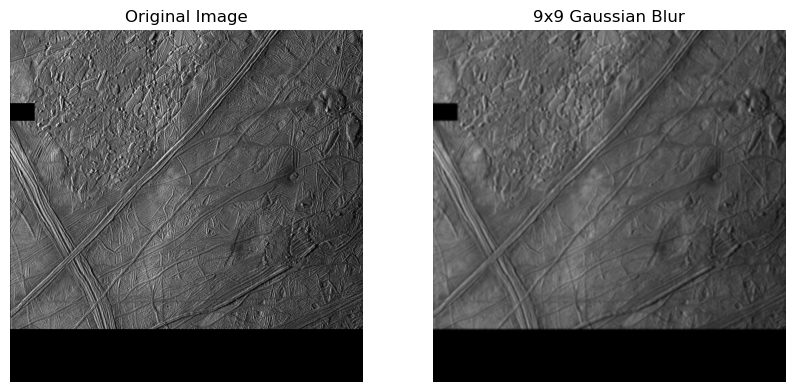

In [4]:
blurred_image = cv.GaussianBlur(original, (9, 9), 0)

plotBoth(blurred_image, '9x9 Gaussian Blur')

## Morphological Operations

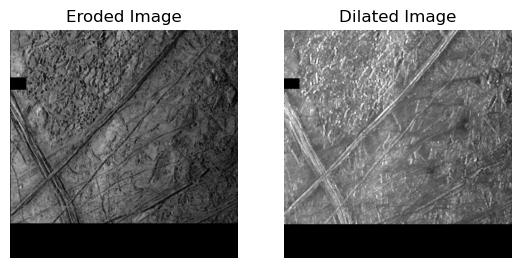

In [5]:
# Perform erosion
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv.erode(image, kernel, iterations=1)

# Perform dilation
dilated_image = cv.dilate(image, kernel, iterations=1)

# Plot the original, eroded, and dilated images
plt.figure(figsize=(10, 5))

# Plot eroded image
plt.subplot(131)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.gcf().patch.set_alpha(0)

# Plot dilated image
plt.subplot(132)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.gcf().patch.set_alpha(0)

plt.show()


## Canny Edge Detection

<Figure size 1000x500 with 0 Axes>

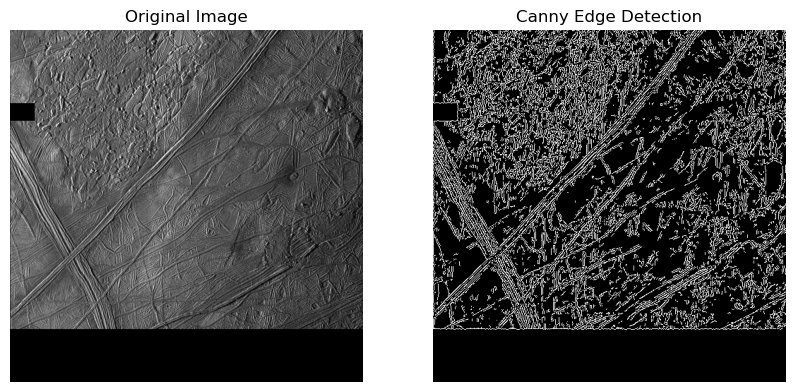

In [6]:
canny_image = cv.Canny(image, 150, 250)
plotBoth(canny_image, 'Canny Edge Detection')

<Figure size 1000x500 with 0 Axes>

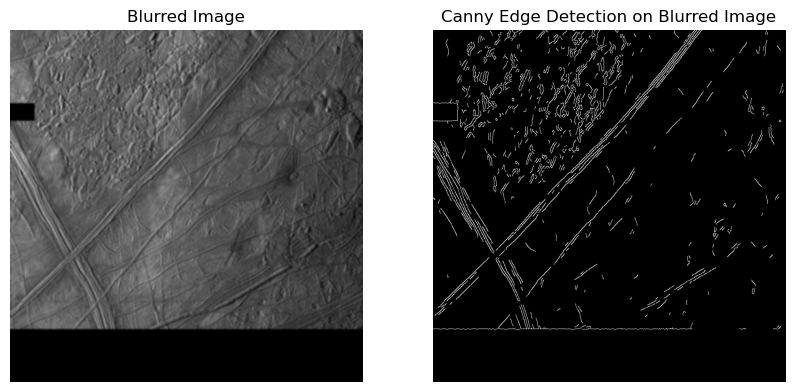

In [7]:
canny_image_blurred = cv.Canny(blurred_image, 100, 150)
plotBoth(canny_image_blurred, 'Canny Edge Detection on Blurred Image', blurred_image, 'Blurred Image')

## Hough Transform

144


<Figure size 1000x500 with 0 Axes>

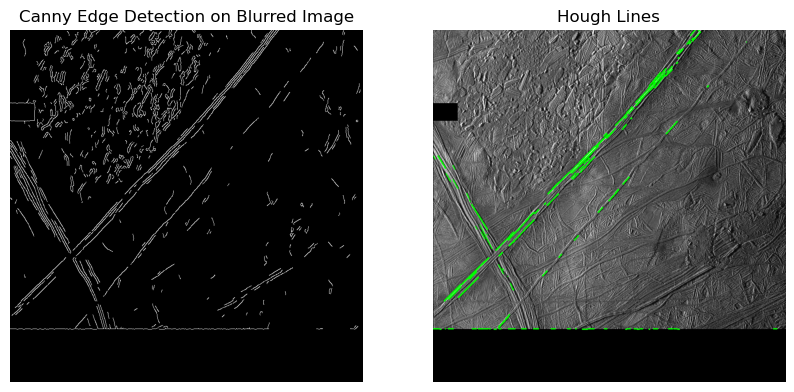

In [8]:
lines = cv.HoughLinesP(canny_image_blurred, 1, np.pi / 180, 120)


output = original.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)
print(len(lines))
plotBoth(output, 'Hough Lines', canny_image_blurred, 'Canny Edge Detection on Blurred Image')

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

<Figure size 1000x500 with 0 Axes>

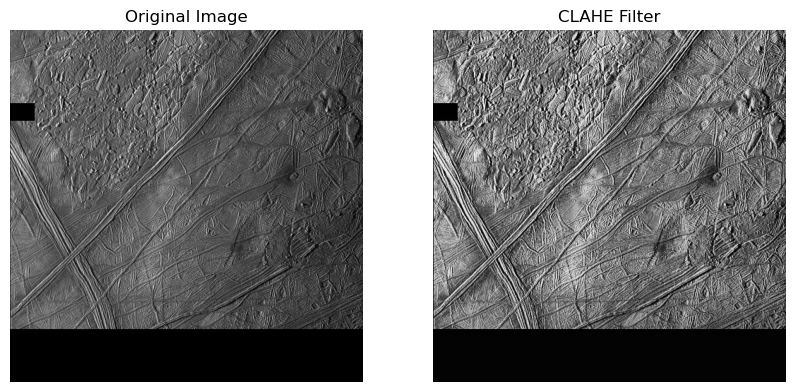

In [10]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
cl_image = clahe.apply(image)
plotBoth(cl_image, 'CLAHE Filter')

## Thresholding

<Figure size 1000x500 with 0 Axes>

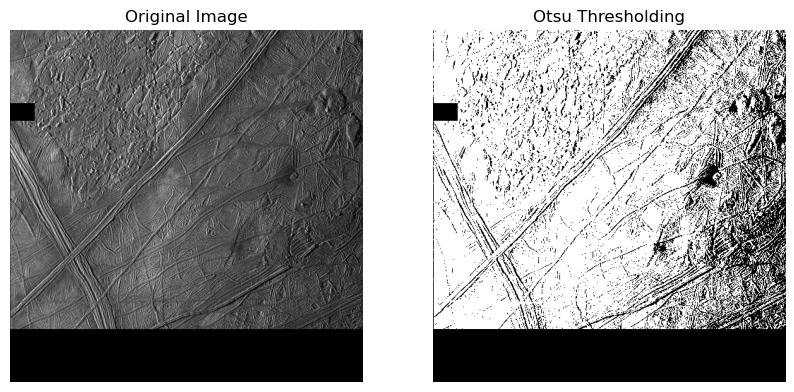

<Figure size 1000x500 with 0 Axes>

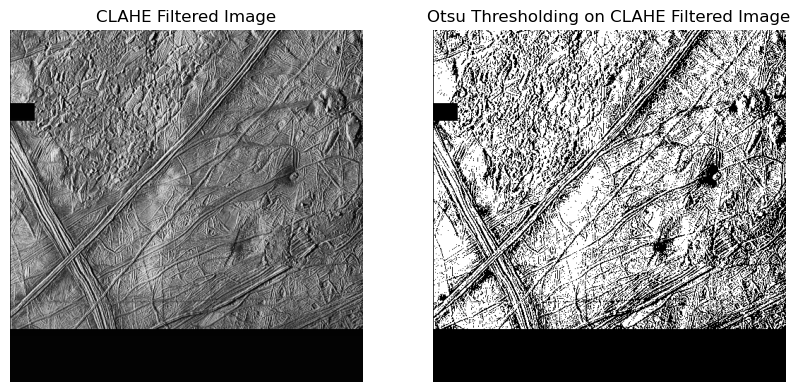

In [32]:
val, thresh = cv.threshold(image,0,255,cv.THRESH_OTSU)
val, thresh_clahe = cv.threshold(cl_image,0,255,cv.THRESH_OTSU)
plotBoth(thresh, 'Otsu Thresholding')
plotBoth(thresh_clahe, 'Otsu Thresholding on CLAHE Filtered Image', cl_image, 'CLAHE Filtered Image')